# DNA Data Science Assessment - Exploratory Analysis and Data Preparation

In [1]:
import pandas as pd
import numpy as np
import pickle

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import random

In [2]:
# Load data
dna = pd.read_csv('DNA_assessment_data.csv')

In [3]:
# First let's look at the dataframe
dna.head(5)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,label
0,132.214506,0.189355,1,0,1,0,0,0,0,0,0,0,39.878984,0.603909,0
1,107.922314,0.798727,0,0,0,0,0,0,0,1,0,0,0.000000,0.243920,1
2,103.651530,0.809856,0,0,1,0,0,0,0,1,0,0,4.470139,0.532151,1
3,125.002167,0.223210,1,0,1,0,0,0,0,0,0,0,82.024387,1.138413,0
4,278.164555,0.086655,1,0,0,0,0,1,0,0,0,0,99.024576,0.611264,0


In [4]:
# What are the column data types?
dna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_1   6000 non-null   float64
 1   feature_2   6000 non-null   float64
 2   feature_3   6000 non-null   int64  
 3   feature_4   6000 non-null   int64  
 4   feature_5   6000 non-null   int64  
 5   feature_6   6000 non-null   int64  
 6   feature_7   6000 non-null   int64  
 7   feature_8   6000 non-null   int64  
 8   feature_9   6000 non-null   int64  
 9   feature_10  6000 non-null   int64  
 10  feature_11  6000 non-null   int64  
 11  feature_12  6000 non-null   int64  
 12  feature_13  6000 non-null   float64
 13  feature_14  6000 non-null   float64
 14  label       6000 non-null   int64  
dtypes: float64(4), int64(11)
memory usage: 703.2 KB


In [5]:
# Use describe to look at data stats
dna.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
feature_1,6000.0,217.531983,158.684982,0.000000e+00,60.359612,219.470265,373.924925,454.810815
feature_2,6000.0,0.152788,0.231753,1.250000e-07,0.007030,0.046105,0.182993,1.000000
feature_3,6000.0,0.581000,0.493437,0.000000e+00,0.000000,1.000000,1.000000,1.000000
feature_4,6000.0,0.167500,0.373453,0.000000e+00,0.000000,0.000000,0.000000,1.000000
feature_5,6000.0,0.343000,0.474751,0.000000e+00,0.000000,0.000000,1.000000,1.000000
feature_6,6000.0,0.076833,0.266349,0.000000e+00,0.000000,0.000000,0.000000,1.000000
feature_7,6000.0,0.058500,0.234706,0.000000e+00,0.000000,0.000000,0.000000,1.000000
feature_8,6000.0,0.209667,0.407105,0.000000e+00,0.000000,0.000000,0.000000,1.000000
feature_9,6000.0,0.062333,0.241780,0.000000e+00,0.000000,0.000000,0.000000,1.000000
feature_10,6000.0,0.175500,0.380426,0.000000e+00,0.000000,0.000000,0.000000,1.000000


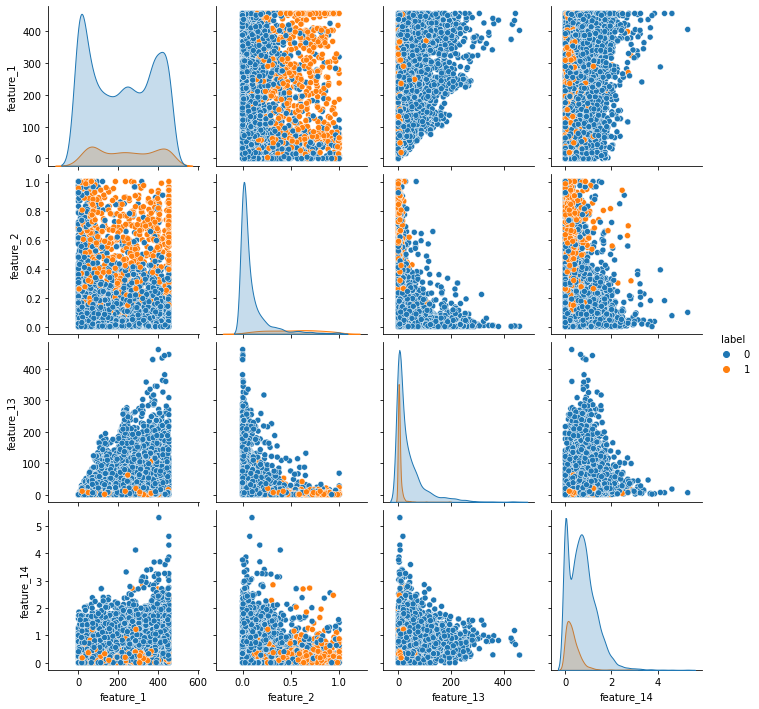

In [6]:
# Look at distribution of non-binary data
sns.pairplot(dna[['feature_1','feature_2','feature_13','feature_14','label']], 
             # diag_kind = 'hist', 
             hue='label')
plt.show()

## Prepare Data for Training and Testing Models

In [64]:
# Prepare data for models
X = dna.drop('label', axis = 1)
y = dna.label

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    stratify=y, # Since data skewed to mostly negative, make sure training and test set have same distribution
                                                    random_state=100)

# Create balanced undersampled training set
true_train_ix = np.array(y_train[y_train==1].index) # indices for true labels

false_train_ix = np.random.choice(np.array(y_train[y_train==0].index), # random indices from training labels false
                                  len(true_train_ix), # make the same length as true labels
                                  replace=False) # sample without replacement

indices = np.sort(np.append(false_train_ix,true_train_ix))

X_train_balanced = X_train.loc[X_train.index.isin(indices)]
y_train_balanced = y_train.loc[y_train.index.isin(indices)]

In [66]:
# Create balanced over sampled training set
true_ix_over = np.random.choice(np.array(y_train[y_train==1].index), # random indices from training labels false
                                  len(y_train[y_train==0]), # make the same length as false labels
                                  replace=True) # sample with replacement

ix_over = np.append(y_train.index, true_ix_over)

X_train_over = X_train.loc[X_train.index.isin(ix_over)]
y_train_over = y_train.loc[y_train.index.isin(ix_over)]

In [81]:
# Save prepared data to pickle
pickle.dump([X_train,y_train,X_train_balanced,y_train_balanced,X_train_over,y_train_over,X_test,y_test],
            open('prepped_data.pkl','wb')
           )